# Логистическая регрессия



In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
data = pd.read_csv('diabetes.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))


(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

/tmp/ipykernel_6960/873743634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='hls')


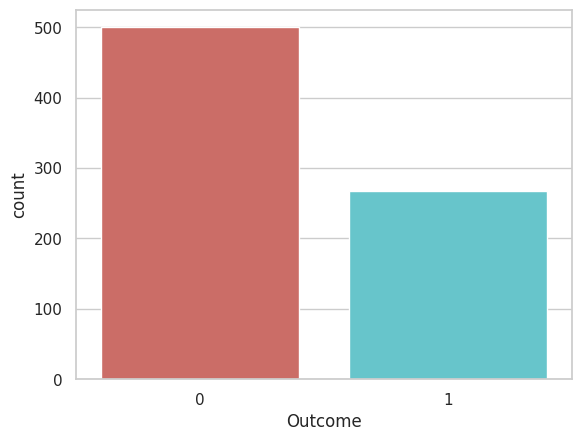

In [8]:
sns.countplot(x='Outcome', data=data, palette='hls')
plt.show()


In [10]:
count_no_sub = len(data[data['Outcome']==0])
count_sub = len(data[data['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("без диабета процент", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("с диабетом процент", pct_of_sub*100)

без диабета процент 65.10416666666666
с диабетом процент 34.89583333333333


Классы наших данных не сбалансированы, а соотношение клиентов без диабета и с диабетом составляет 65 к 35. До балансировки классов проведём ещё несколько исследований:

In [11]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
